In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster 

(a) plot 1000 points from multivariate normal

Text(0.5,1,'Users: mean = 0, var = I')

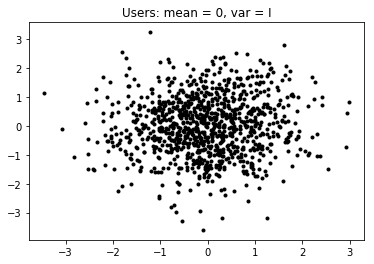

In [4]:
## data collection (generation)
num_user = 1000
mean = [0,0]
var = [[1,0],[0,1]]
users = np.random.multivariate_normal(mean,var,num_user)
plt.plot(users[:,0],users[:,1],'.',c = '0')
plt.title('Users: mean = 0, var = I')
#users.values
#users_data

(b) cluster into 3 

In [5]:
from sklearn.cluster import KMeans
kmeans = sklearn.cluster.KMeans(n_clusters = 3).fit(users)
y_means = kmeans.predict(users)


In [7]:
type(users)

numpy.ndarray

array([[ 0.45138895, -0.98603159],
       [ 0.45540922,  0.87870358],
       [-1.10013217, -0.07821826]])

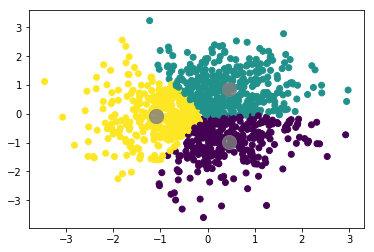

In [13]:
#kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(users[:,0],users[:,1],c=y_means, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c = '0.5', s= 200, alpha = 0.8)
centers


In [14]:
centers

array([[ 0.45138895, -0.98603159],
       [ 0.45540922,  0.87870358],
       [-1.10013217, -0.07821826]])

(c)(d) move the data points and compare results

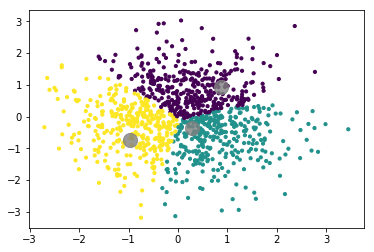

In [112]:
## modify new data
T = 1
new_users = users.copy()
for t in range(T):
    new_users = .99*new_users + 0.01* centers[y_means]

kmeans2 = sklearn.cluster.KMeans(n_clusters = 3).fit(new_users)
y_means2 = kmeans.predict(new_users)
centers2 = kmeans2.cluster_centers_
plt.scatter(new_users[:,0],new_users[:,1],c=y_means2, s= 10)
plt.scatter(centers[:,0],centers2[:,1],s = 200,alpha = 0.8, c = '0.5')


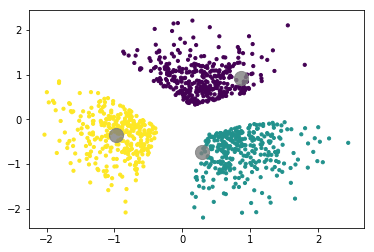

In [113]:
## modify new data
T = 50
new_users = users.copy()
for t in range(T):
    new_users = .99*new_users + 0.01* centers[y_means]

kmeans2 = sklearn.cluster.KMeans(n_clusters = 3).fit(new_users)
y_means2 = kmeans.predict(new_users)
centers2 = kmeans2.cluster_centers_
plt.scatter(new_users[:,0],new_users[:,1],c=y_means2, s= 10)
plt.scatter(centers[:,0],centers2[:,1],s = 200,alpha = 0.8, c = '0.5')


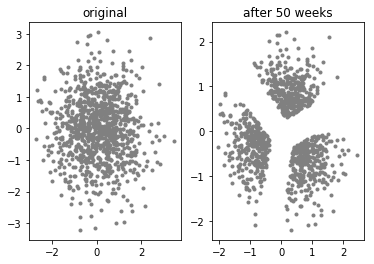

In [114]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(users[:,0],users[:,1],'.',c = '0.5')
plt.title('original')

plt.subplot(1,2,2)
plt.plot(new_users[:,0],new_users[:,1],'.',c = '0.5')
plt.title('after 50 weeks')

plt.show()

The points are drifting away from the original center (0,0) and cluster around their new centers. This is because after we get 3 centers for the clusters, we move points to the center of the cluster a little bit; this way the next time we perform the same k-means methods the three clusters will be more distinguished from each other. 